In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Point processing

Threshholding

thresholding have 2 important parameter which are the threshold and the maximum value to set.

assuming the value of threshold is T and the maximum is M, therefore,

if img[i,j] < T, then img[i,j]=0
if img[i,j] >= T then img[i,j]= M

Gray-scaling

in grayscaling basically calculating with all the rgb value into one single gray value. assuming Y is the new gray pixel value, R is the red value, B is the blue value and G is the green value. therefore the formula will be

Y=0.299*R+0.587.G+0.114*B

Negative transformation

negative transformation is switching between the dark pixel with the white pixel. this can be done with formula below.

assuming Y is the new pixel value and X is the current pixel value, and L is the maximum pixel value in the image. Therefore,

Y=L-X

Histogram Equalization

Histogram equalization is a way to increase contrast for the image. This distributes the pixel values to a greater pixel value.

The formula can be written down as

Yi = CDF(i) * L

Yi is the new pixel value
i is the current pixel value
L is the maximum range of the histogram equlization or maximum brightness value allowed

CDF(i) is the sum of the frequency of pixel value from 0 to i divided by the number of total pixel in the image.


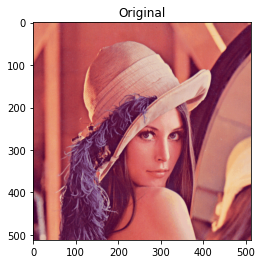

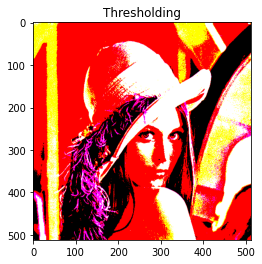

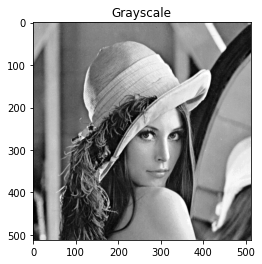

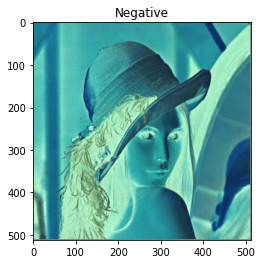

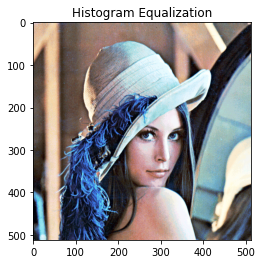

In [ ]:
#load image
import imageio
lenaGif = imageio.mimread('lena_color.gif')
lena = lenaGif[0]
plt.imshow(lena)
plt.title('Original')
plt.show()

#thresholding 
_,lenaThresh = cv2.threshold(lena,120,255,cv2.THRESH_BINARY)
plt.imshow(lenaThresh)
plt.title('Thresholding')
plt.show()

#grayscale
lenaGray = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
plt.imshow(lenaGray,cmap='gray')
plt.title('Grayscale')
plt.show()



#negative transformation
height, width, _ = lena.shape 
lenaNeg=lena.copy()
for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = lenaNeg[i, j] 
          
        # red pixel 
        pixel[0] = 255 - pixel[0] 
          
        #  green pixel 
        pixel[1] = 255 - pixel[1] 
          
        # blue pixel 
        pixel[2] = 255 - pixel[2] 
          
        # Store new values in the pixel 
        lenaNeg[i, j] = pixel 

plt.imshow(lenaNeg)
plt.title('Negative')
plt.show()


#histogram equalization
r = lena[:,:,0]
g = lena[:,:,1]
b = lena[:,:,2]
equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)
lenaEq = cv2.merge((equ_r, equ_g, equ_b))

plt.imshow(lenaEq)
plt.title('Histogram Equalization')
plt.show()



2. Convolution

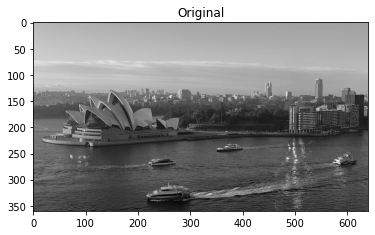

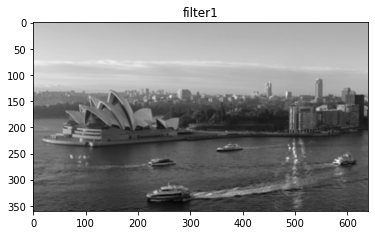

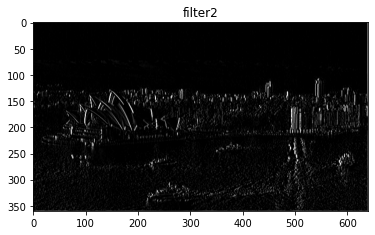

In [ ]:
#Load image
from PIL import Image,ImageFilter
from scipy import signal, misc
sydney = Image.open('Sydney-Opera-House.jpg').convert('L')

plt.imshow(sydney,cmap='gray')
plt.title('Original')
plt.show()

#convolution

filter1 = np.ones(9, np.float32) / 9

filter2 = np.array([ 1, 0,  -1,
                    1, 0, -1,
                    1, 0, -1])

sydney1 = sydney.filter(ImageFilter.Kernel((3, 3), filter1,1,0))
plt.imshow(sydney1,cmap='gray')
plt.title('filter1')
plt.show()

sydney2 = sydney.filter(ImageFilter.Kernel((3, 3), filter2,1,0))
plt.imshow(sydney2,cmap='gray')
plt.title('filter2')
plt.show()

3. Harris corner detector

a. A corner is where there is a change of gradient in more than 1 direction. the use of corner detection is usually for classification in object recognition as it can become the characteristic of the image.

b. If M is second moment matrix of image derivatives, please explain mathematically how to classify image points based on M Matrix!

to classify the image points it can use the formula shown below

R= det(M) - k(trace(M))^2

where 

R is the value of corner. greater R value shows that it is a corner, when R < 0 it is an edge, and when R is small is a flat region.

det(M) = lambda1 * lambda2
trace(M) = lambda1 + lambda2
lambda1 and lambda2 is the eigenvalue of M
k is the constant that can be change in the function

c. Harris corner detection is a derived algorithm based on Moravec corner detection. it takes the flaw of the algorithm and improve it. There are 3 problems that is tackled in Harris corner detection. first is the response is anisotropic due to only a change of shifts at every 45 degrees. This is tackled by performing an analytic expansion about the shift origin. The second is the response to noisy image due to the window is binary and rectangular. this can tackled by having a gaussian window. The third is the operation is too readily for edges since only small E is taken into account. this is tackeled by having to make use of the variation of E with the direction of shift. From the new formulated equation from number 3 a derived M matrix can be obtained and can be used to classify image points as explained at b.

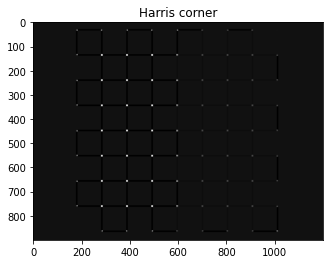

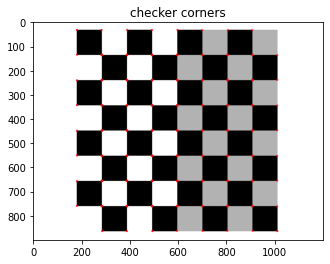

In [ ]:
#d.
#load image
checker = cv2.imread('checkerboard_101.png')

#get corner
checkerGray = cv2.cvtColor(checker, cv2.COLOR_RGB2GRAY)
checkerHarris = cv2.cornerHarris(checkerGray, 7, 3, 0.04)
plt.imshow(checkerHarris, cmap='gray')
plt.title('Harris corner')
plt.show()

#plot corner to image

th = 0.1 * checkerHarris.max()
checkerCorner = checker
for i in range(0, checkerHarris.shape[0]):
    for j in range(0, checkerHarris.shape[1]):
        if(checkerHarris[i,j] > th):
            cv2.circle(checkerCorner, (j, i), 1, (255,0,0), 1)
plt.imshow(checkerCorner)
plt.title('checker corners')
plt.show()

4. Canny edge detection

a. The purpose of noise reduction is because edge detection is sensitive to noise. Since sobel kernel checks the amount of change in the surrounding pixel, if there is alot of noise the value of the soble kernel can be bias. noise reduction can be reduced by smoothening the image. In canny edge detection it uses 5x5 gaussian filter.


b. Finding Intensity Gradient of the Image is a process where it uses both sobel x and sobel y filter to find the intensity of the change in gradient. combining both sobel x and sobel y value to get the intensity gradient can be use to determine how likely is the pixel is an edge from the value. the value can be obtained by finding the ecludian distance of sobel x and sobel y or manhattan distance. assuming y is the intensity gradient value therefore

ecludian:

y = sqr root(sobelx(pixel)^2 +sobely(pixel)^2)

manhattan:

y = sobelx(pixel) + sobely(pixel).

by combining both sobelx and sobel y it will ensure that it will check edges that is not limited to vertical or horizontal.


c. Non-maximum Suppression is to reduce the amount of edges detected by just finding the local maxima. this will allow to find a sharper edge. this is based on the intensity gradient and gradient direction. it will then find the local maxima based on the neighbour of the gradient direction.


d.Hysteresis Thresholding is a way to ensure getting a "sure edge" from the image. it uses two threshold. the first threshold is the minimum value of the threshold and the second is the maximum value of the threshold. Anything below the minimum threshold will be considered as a none edge. between the minimum and maximum value is a weak edge and above maximum value is a sure edge. a weak edge can either be an edge or not an edge. this can be determined if the edge that is connected is connected with a pixel that is above the maximum value or a sure edge. this ensures that the weak edge is part of the sure edge. Otherwise it is discarded.

(617, 750)


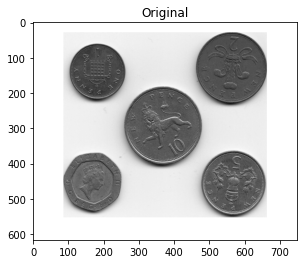

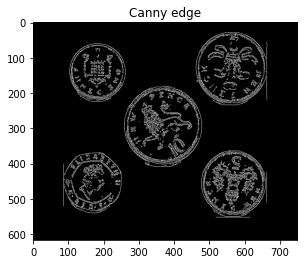

In [ ]:
#load image
img = cv2.imread("DetectAndMeasureCircularObjectsThingSpeakExample_01.png", 0) 
#apply canny
imgEdge = cv2.Canny(img, 80, 120)

#plot result
plt.imshow(img, cmap="gray")
plt.title('Original')
plt.show()
plt.imshow(imgEdge, cmap="gray")
plt.title('Canny edge')
plt.show()